<a href="https://colab.research.google.com/github/ParnianH98/CNN-Convolutional-Neural-Network-/blob/main/Neural_Network_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

from sklearn.utils import resample
from google.colab import files
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


load data: train and test

In [2]:
data = pd.read_csv(r'/gdrive/My Drive/AI HW/Neural Network optimization/train.csv')
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##preprocessing

check for missing values

no not available data 

In [3]:
data.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

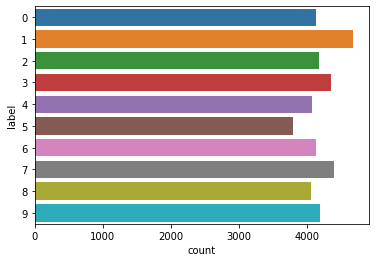

In [4]:
random_seed = 2


Y_train = data["label"]

# Drop 'label' column
X_train = data.drop(labels = ["label"],axis = 1) 

# free some space
del data 

g = sns.countplot(y=Y_train)

Y_train.value_counts()

almost balanced

In [5]:
X_train.shape

(42000, 784)

In [6]:
# X_test.shape

normalaize

In [7]:
X_train = X_train / 255.0


In [8]:
# # Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1) ---> not RGB
X_train = X_train.values.reshape(-1,28,28,1)
# X_test = X_test.values.reshape(-1,28,28,1)

In [9]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)

split training and test

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

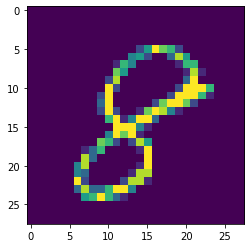

In [11]:
# Some examples
g = plt.imshow(X_train[0][:,:,0])

##define the RMSprop model

In [12]:
# Set the CNN RMSprop 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

RMSpropmodel = Sequential()

RMSpropmodel.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
RMSpropmodel.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
RMSpropmodel.add(MaxPool2D(pool_size=(2,2)))
RMSpropmodel.add(Dropout(0.25))


RMSpropmodel.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
RMSpropmodel.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
RMSpropmodel.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
RMSpropmodel.add(Dropout(0.25))


RMSpropmodel.add(Flatten())
RMSpropmodel.add(Dense(256, activation = "relu"))
RMSpropmodel.add(Dropout(0.5))
RMSpropmodel.add(Dense(10, activation = "softmax"))

In [13]:
# Define the optimizer
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
# Compile the RMSprop
RMSpropmodel.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics='accuracy')

In [14]:
epochs = 10 # Turn epochs to 30 to get 0.9967 accuracy # tooooo long run time
batch_size = 86

In [ ]:
# Fit the RMSprop
RMShistory = RMSpropmodel.fit(X_train,Y_train, batch_size=batch_size,
                              epochs = epochs, validation_data = (X_test,Y_test),verbose=2)

Epoch 1/10


###evaluation

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, confusion_matrix
predict = RMSpropmodel.predict(X_test).argmax(axis=1)
print(classification_report(Y_test.argmax(axis=1), predict))

همانطور که مشخص است دقت بالای 99 درصد حاصل شد در نهایت.مقادیر متفاوت این متغیرهای آماری که در فصل 5 گزارش توضیح داده شدند، هم مقادیر بالایی را نشان می‌دهند به جز مقدار precision برای ارقام 8 و 9  که به ترتیب در 4 و 3 درصد مواقع به یک لیبل فالس برای این ارقام، اشتباها لیبل ترو نسبت می‌دهد. به همین دلیل مقدار f1-score این دو نیز 98 درصد است که میانگین نرخ‌های فوق و است و طبیعتا کاهش میابد.
عدد 4 نیز racall با خطای 2 درصد دارد که به آن معناست که در 2 درصد مواقع اعدادی که واقعا 4 بودند، چیز دیگری تشخیص داده شده‌اند.

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = RMSpropmodel.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

همانطور که درگزارش نیز بیان شد، در اینجا نشان داده می‌شود که هر رقم چند بار به چه رقمی تشخیص داده شده است. به طور کلی اکثر ارقام درست تشخیص داده شده‌اند. بیشترین نرخ اشتباه همانطور که در بالا هم گویا بود، مربوط به پیشگویی ارقام 8 و 9 است. رقم 8 اشتباها 5 بار به جای 2، و 5 بار به جای 3 شناخته شده و رقم 9 . اشتباها 6 بار به جای 4 و 3 بار به جای 7 شناخته شده است. سایر اشتباهات 1 یا 2 بار رخ داده‌اند و در مجموع 43 تشخیص اشتباه از بین 4200 داده تست اشتباه تشخیص داده شده‌اند که 16 مورد برای تشخیص 0 تا 7 بوده و سایر 27 اشتباه در تشخیص 8 و 9 بوده. یعنی 8  و 9 ارقامی هستند که برای این ممکن است بیشتر به جای ارقام دیگر شناخته شوند. پس اگر در تسخیص رقمی ورودی، جواب 8 یا 9 دریافت کردیم، 3-4 درصد احتمال دهیم که رقم اشتباه تشخیص داده شده و شاید بهتر باشد از مدلی که در تشخیص، کمتر این خطا را میکند، استفاده کنیم.
اعداد با رقم واقعی 1 و 4 نیز بیشترین بار تشخیص داد نشده‌اند و اشتباها چیز دیگری تشخیص داده شده‌اند که رقم 4 طبق گزارش بالا انتظار میرفت اما 1 نه. 

مدل زیر با تغییر یک لایه شبکه، نتیجه بهتری حاصل کرد

##define the Adam model

In [ ]:
# Set the CNN adam
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out
AdamModel = Sequential()

AdamModel.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu', input_shape = (28,28,1)))
AdamModel.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu'))
AdamModel.add(MaxPool2D(pool_size=(2,2)))
AdamModel.add(Dropout(0.25))


AdamModel.add(Conv2D(filters = 64, kernel_size = (3,3), activation ='relu'))
AdamModel.add(Conv2D(filters = 64, kernel_size = (3,3), activation ='relu'))
AdamModel.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
AdamModel.add(Dropout(0.25))


AdamModel.add(Flatten())
AdamModel.add(Dense(256, activation = "relu"))
AdamModel.add(Dropout(0.5))
AdamModel.add(Dense(10, activation = "softmax"))



set the optimizer

In [ ]:
# Define the optimizer
# Compile the adam
AdamModel.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics='accuracy')

In [ ]:
# Fit the adam
Adamhistory = AdamModel.fit(X_train,Y_train, batch_size=batch_size,
                              epochs = epochs, validation_data = (X_test,Y_test),verbose=2)

###evaluation

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, confusion_matrix
predict = AdamModel.predict(X_test).argmax(axis=1)
print(classification_report(Y_test.argmax(axis=1), predict))

مشاهده می‌کنیم که این مدل برای هیچ رقمی خطای بالای 2 درصد ندارد. درست است که مثل مدل قبل دقت نهایی آن 99 درصد است اما روی یک رقم خاص خطای بالاتر ندارد. خطاهای 2 درصد هم برای precision رقم 8 رخ داده که نشان میدهد در 2 درصد مواقع اشتباه به یک لیبل فالس برای رقم 8 اشتباها ترو داده میشود. مانند مدل قبل اما این بار با خطای کمتر. همچنین یک خطای 2 درصد هم در recall رقم 9 دیده می‌شود که نشان می‌دهد این مدل در سافتن همه    9ها  2درصد خطا دارد.

confusion matrix

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = AdamModel.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

اینجا به طرز مشهودی نشخیص اشتباه در هیچ رقمی بالای 2 بار رویت نمیشود. طبق انتطار از نتایج بالا، رقم 8 بیشترین مجموع خطای تشخیص را دارد (ستون 8) و رقم 9 بیشترین مقدار تشخیص داده نشدن (سطر 9 یا ارقامی که واقعا 9 بودند اما چیز دیگری شناخته شدند)

In [ ]:
plt.plot(range(10) , RMShistory.history['accuracy'] , label="RMSprop")
plt.plot(range(10) , Adamhistory.history['accuracy'] , label="adam")

plt.legend(loc='best')
plt.show()

همانطور که در گزارش نیز بیان شده، از آنجا که مدل دوم از ترکیب مدل اول با مدل دیگری به دست آمده و همچنین از گزارش‌های بالا، انتظار میرفت که به طور کلی دقت بالاتری داشه باشد اما نتایج نشان میدهد تا رقم 6 این دقت تشخیص در مدل اول بهتر بوده. البته اگر مدل‌ها را روی مقادیر آماری دیگر به جز accuraccy
فیت میکردیم، نتایج تفاوت میکرد. همانطور که در بالا هم توضیح دادیم مدل آدام در مجموع خطای پایینتری داشت. برای مثال اگر مدل را روی precision
فیت میکردیم، نتایج متفاوت‌تر میشد زیرا مدل دوم برای ارقام کوچکتر دقت 100درصدی دارد.